**Import all the librairies and functions**

In [154]:
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt, freqz
import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd
#MNE
import mne
from mne.time_frequency import tfr_morlet
from importlib import reload 
from os.path import join, dirname, realpath, exists

#load poly5reader
# define current working directory (the one that contains this notebook): this is the project_path
os.chdir('c:\\Users\\Juliette\\Research\\Projects\\Synchronization project\\Code\\Synchronization')
project_path = os.getcwd()

# change temporarily the working directory to go fetch the poly5 reader: this is the code_path
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'tmsi-python-interface-main'))
code_path = os.getcwd()

print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch Poly5 reader:{code_path}')

#fetch the poly5 reader
from TMSiFileFormats.file_readers import Poly5Reader

# set the working directory back to the project_path
os.chdir(project_path)

# change temporarily the working directory to go fetch the peakdetect funciton: this is the code_path
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'peakdetect-master'))
code_path = os.getcwd()

print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch peakdetect:{code_path}')

#fetch the poly5 reader
from peakdetect import peakdetect

# set the working directory back to the project_path
os.chdir(project_path)


# load pyPerceive functions
os.chdir('c:\\Users\\Juliette\\Research\\Projects\\Synchronization project\\Code\\Synchronization')
project_path = os.getcwd()
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'PyPerceive'))
os.chdir(os.path.join(os.getcwd(), 'code'))
code_path = os.getcwd()
print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch PyPerceive functions:{code_path}')

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

#reset the proper working directory for the analysis
os.chdir(project_path)

working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch Poly5 reader:c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main
working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch peakdetect:c:\Users\Juliette\Research\Projects\Synchronization project\Code\peakdetect-master
working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch PyPerceive functions:c:\Users\Juliette\Research\Projects\Synchronization project\Code\PyPerceive\code


**Open LFP data**

if PyPerceive:

In [ ]:
# define an example instance and fill in the values of the dataclass PerceiveData 
# choose the values you are interested in analyzing further

sub061 = main_class.PerceiveData(
    sub = "061", 
    incl_modalities=['survey', 'streaming'],
    incl_session = ['postop', 'fu12m', 'fu18m'],
    incl_condition =['m0s0', ],
    incl_task = ["rest"],
    incl_contact = ["RingL", "SegmInterR", "SegmIntraR"],
    import_json=False,
    warn_for_metaNaNs=True,
    # use_bids=True,  # TODO: add to functionality
)

#store the MNE object in the variable
sub061_data = sub061.streaming.postop.m0s0.rest.run1.data
#look at the MNE object
sub061_data

without pyPerceive:

Example with sub-029 18MFU M0S0 Rest:

In [2]:
datapath = 'C:\\Users\\Juliette\\OneDrive\\Bureau\\Recordings\\PERCEPT recordings\\sub-029\\18MFU\\MedOFF\\sub-20210924PStn\\ses-2023020808345883\\ieeg'
filename = 'sub-20210924PStn_ses-2023020808345883_run-BrainSense20230208091500.mat'
data = mne.io.read_raw_fieldtrip(        
	os.path.join(datapath, filename),        
	info={}, # add info here        
	data_name='data',  # name of heading dict/ variable of original MATLAB object    
)
data.ch_names
n_chan = len(data.ch_names)
data.n_times #number of samples
data.times #timepoints set to zero
data._data # channel trials
data.info['sfreq'] # sampling frequency
time_duration = (data.n_times/data.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000
print(     
	f'The data object has:\n\t{data.n_times} time samples,'      
	f'\n\tand a sample frequency of {data.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{data.ch_names}.')


Creating RawArray with float64 data, n_channels=6, n_times=43063
    Range : 0 ... 43062 =      0.000 ...   172.248 secs
Ready.


c:\Users\Juliette\anaconda3\envs\mne\lib\site-packages\pymatreader\utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
C:\Users\Juliette\AppData\Local\Temp\ipykernel_11572\1827813970.py:3: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  data = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_11572\1827813970.py:3: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13. Making it a MISC channel.
  data = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_11572\1827813970.py:3: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_03. Making it a MISC channel.
  data = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_11

The data object has:
	43063 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 172.252 seconds.
	6 channels were labeled as 
['LFP_Stn_L_13', 'LFP_Stn_R_03', 'LFP_Stn_L_13_PEAK17Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_03_PEAK16Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'].


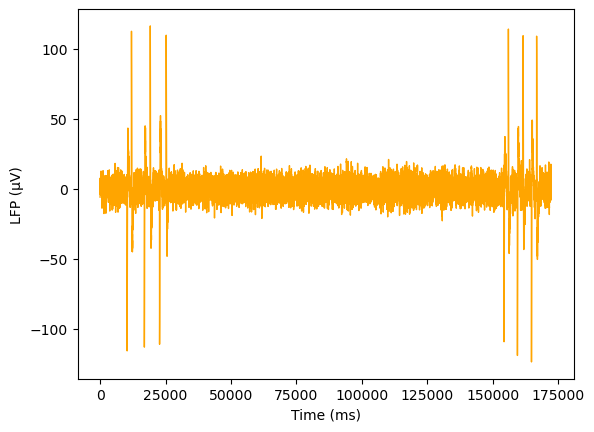

In [3]:
LFP_Stn_L_13 = data.get_data()[0]
x1_time=np.arange(0,time_duration_ms,time_duration_ms/data.n_times)
df_LFP=pd.DataFrame(x1_time,LFP_Stn_L_13)
plt.xlabel('Time (ms)')
plt.ylabel('LFP (µV)')
plt.plot(x1_time,LFP_Stn_L_13, linewidth=1,color='orange')


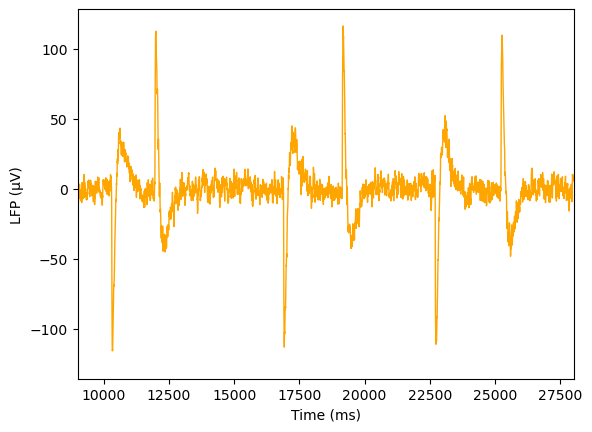

In [30]:
plt.xlabel('Time (ms)')
plt.ylabel('LFP (µV)')
plt.xlim(9000,28000)
plt.plot(x1_time,LFP_Stn_L_13, linewidth=1,color='orange')

In [5]:
artefact_start_time_LFP = 0
i = 0
for i in range(0,len(LFP_Stn_L_13)-1):
    if (LFP_Stn_L_13[i] <= -50):
        artefact_start_time_LFP = x1_time[i]
        break
    else:
        i = i+1
print(f'the first artefact in the LFP starts at \n\t{artefact_start_time_LFP} ms')

the first artefact in the LFP starts at 
	10316.0 ms


In [9]:
artefact_end_time_LFP = 0
j = 0
for j in range((int(artefact_start_time_LFP/1000*data.info["sfreq"])),len(LFP_Stn_L_13)-1):
    if (LFP_Stn_L_13[j] >= 50):
        artefact_end_time_LFP = x1_time[j]
        break
    else:
        j = j+1
print(f'the first artefact in the LFP ends at \n\t{artefact_end_time_LFP} ms')

the first artefact in the LFP ends at 
	11972.0 ms


In [35]:
LFP_artefact_duration = artefact_end_time_LFP - artefact_start_time_LFP
print(f'the first artefact in the LFP lasts \n\t{LFP_artefact_duration} ms')

the first artefact in the LFP lasts 
	1656.0 ms


In [18]:
second_artefact_start_time_LFP = 0
k = 0
for k in range((int(artefact_end_time_LFP/1000*data.info["sfreq"])),len(LFP_Stn_L_13)-1):
    if (LFP_Stn_L_13[k] <= -50):
        second_artefact_start_time_LFP = x1_time[k]
        break
    else:
        k = k+1
print(f'the second artefact in the LFP starts at \n\t{second_artefact_start_time_LFP} ms')

the second artefact in the LFP starts at 
	16900.0 ms


In [19]:
delay_between_artefacts_LFP = second_artefact_start_time_LFP - artefact_start_time_LFP
delay_between_artefacts_LFP

6584.0

Loop to detect all start-times and end-times, compile those values in a list

In [50]:
#initialize variables (lists and state)
artefacts_x_LFP = []
artefacts_y_LFP = []
state_LFP:str = "stim_OFF"

#start looking at each value one by one and append the timepoint to the proper list depending on the state and threshold crossed
for n in range(0,(len(LFP_Stn_L_13)-1)):
    if (LFP_Stn_L_13[n] <= -60) and (state_LFP != "stim_ON"):
        artefacts_x_LFP.append(x1_time[n])
        artefacts_y_LFP.append(LFP_Stn_L_13[n])
        state_LFP = "stim_ON"
    else:
        n = n+1
         
    if (LFP_Stn_L_13[n] >= 60) and (state_LFP != "stim_OFF"):
        artefacts_x_LFP.append(x1_time[n])
        artefacts_y_LFP.append(LFP_Stn_L_13[n])
        state_LFP = "stim_OFF"
    else:
        n = n+1
print(
    f'\n\tthe artefacts in the LFP are at: \t{artefacts_x_LFP} ms')




	the artefacts in the LFP are at: 	[10316.0, 11972.0, 16900.0, 19148.0, 22708.0, 25228.0, 154300.0, 155956.0, 159404.0, 161576.0, 164772.0, 166748.0] ms


Take the lowest/highest points from the artefact:

In [408]:
#initialize variables (lists and state)
artefacts_x_LFP = []
artefacts_y_LFP = []
state_LFP:str = "stim_OFF"

#start looking at each value one by one and append the timepoint to the proper list depending on the state and threshold crossed
for n in range(0,(len(LFP_Stn_L_13)-1)):
    if (LFP_Stn_L_13[n] <= -60) and (state_LFP != "stim_ON") and (LFP_Stn_L_13[n] < LFP_Stn_L_13[n+1]) and (LFP_Stn_L_13[n] < LFP_Stn_L_13[n-1]):
        artefacts_x_LFP.append(x1_time[n])
        artefacts_y_LFP.append(LFP_Stn_L_13[n])
        state_LFP = "stim_ON"
    else:
        n = n+1
         
    if (LFP_Stn_L_13[n] >= 60) and (state_LFP != "stim_OFF") and (LFP_Stn_L_13[n] < LFP_Stn_L_13[n+1]) and(LFP_Stn_L_13[n] < LFP_Stn_L_13[n-1]):
        artefacts_x_LFP.append(x1_time[n])
        artefacts_y_LFP.append(LFP_Stn_L_13[n])
        state_LFP = "stim_OFF"
    else:
        n = n+1
print(
    f'\n\tthe artefacts in the LFP are at: \t{artefacts_x_LFP} ms')


	the artefacts in the LFP are at: 	[10336.0, 12048.0, 16920.0, 19184.0, 22728.0, 156000.0, 159432.0, 161612.0, 164800.0, 166780.0] ms


Plot artefact points on raw signal to visualize them

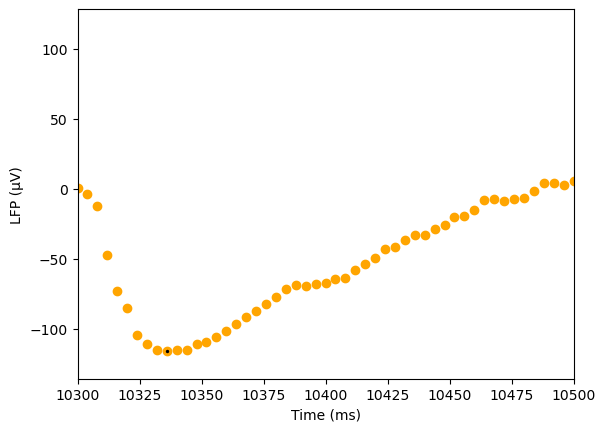

In [409]:
plt.xlabel('Time (ms)')
plt.ylabel('LFP (µV)')
plt.xlim(10300,10500)
plt.scatter(x1_time,LFP_Stn_L_13, linewidth=1,color='orange')
#plt.plot(x1_time[:-1],np.diff(LFP_Stn_L_13), linewidth=1,color='green')
plt.scatter(artefacts_x_LFP,artefacts_y_LFP,color='black',s=2)


Determine duration of each artefact detected

In [116]:
artefact_duration_LFP=[]
range_o=np.arange(1,len(artefacts_x_LFP),2)
range_p=np.arange(0,len(artefacts_x_LFP),2)

for o,p in zip(range_o,range_p):
        artefact_duration_LFP.append(artefacts_x_LFP[o]-artefacts_x_LFP[p])

artefact_duration_LFP

[1656.0, 2248.0, 2520.0, 1656.0, 2172.0, 1976.0]

**Open sensor-data**

In [126]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
#mne_object.plot(start = 5, duration = 5, n_channels = 2) #(only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x2_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Recordings/TMSi files/sub-029/sub_029_18mfu_M0S0_BrStr_Rest - 20230208T101007/sub_029_18mfu_M0S0_BrStr_Rest-20230208T101007.DATA.Poly5
	 Number of samples:  795141 
	 Number of channels:  80 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=80, n_times=795141
    Range : 0 ... 795140 =      0.000 ...   198.785 secs
Ready.
The data object has:
	795141 time samples,
	and a sample frequency of 4000.0 Hz
	with a recording duration of 198.78525 seconds.
	80 channels were labeled as 
['CREF', 'UNI 01', 'UNI 02', 'UNI 03', 'UNI 04', 'UNI 05', 'UNI 06', 'UNI 07', 'UNI 08', 'UNI 09', 'UNI 10', 'UNI 11', 'UNI 12', 'UNI 13', 'UNI 14', 'UNI 15', 'UNI 16', 'UNI 17', 'UNI 18', 'UNI 19', 'UNI 20', 'UNI 21', 'UNI 22', 'UNI 23', 'UNI 24', 'UNI 25', 'UNI 26', 'UNI 27', 'UNI 28', 'UNI 29', 'UNI 30', 'UNI 31', 'UNI 32', 'UNI 33', 'UNI 34', 'UNI 35', 'UNI 36', 'UNI 37', 'UNI 38', 'UNI 39

c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'Z', 'Y', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


In [7]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

Using qt as 2D backend.


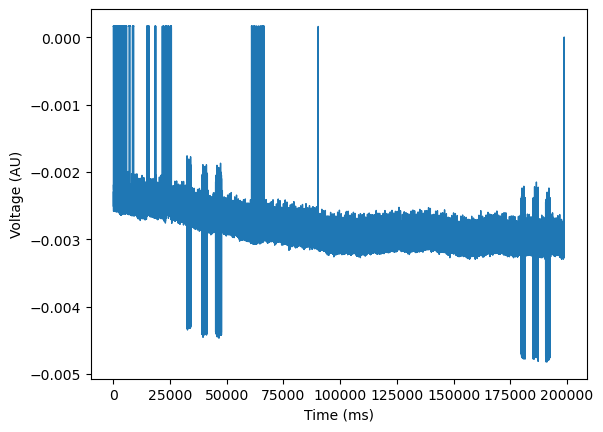

In [127]:
BIP01 = mne_object.get_data()[65]
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (AU)')
plt.plot(x2_time,BIP01,linewidth=1)
plt.xlim
plt.show()

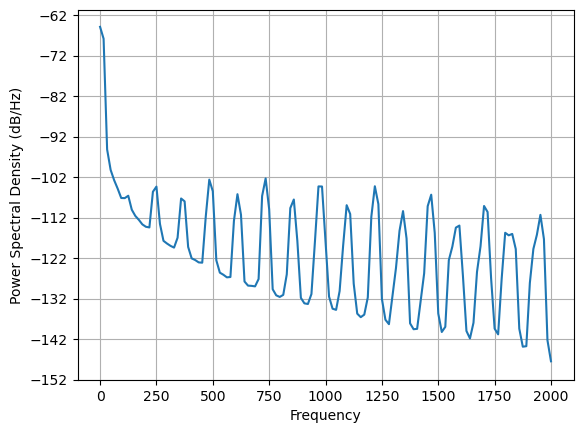

In [24]:
#mne_object.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)

plt.psd(BIP01, Fs=4000)
plt.show()

In [129]:
#mne_object_filtered = mne_object.copy().filter(l_freq=1, h_freq=None,picks=picks)

mne_object_filtered = mne.filter.filter_data(BIP01,sfreq=4000,l_freq=1, h_freq=None)

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 13201 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


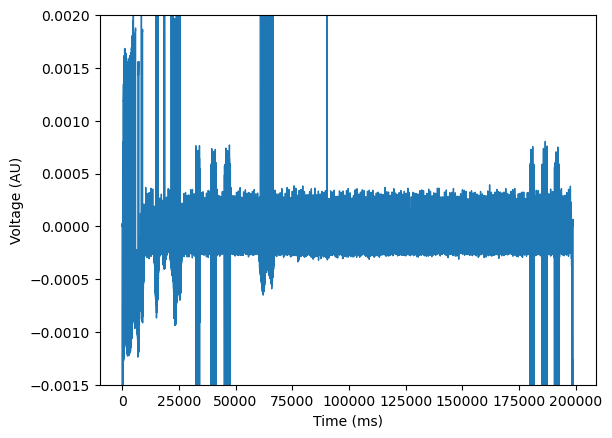

In [130]:
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (AU)')
plt.ylim(-0.0015,0.002)
plt.plot(x2_time,mne_object_filtered,linewidth=1)
plt.show()

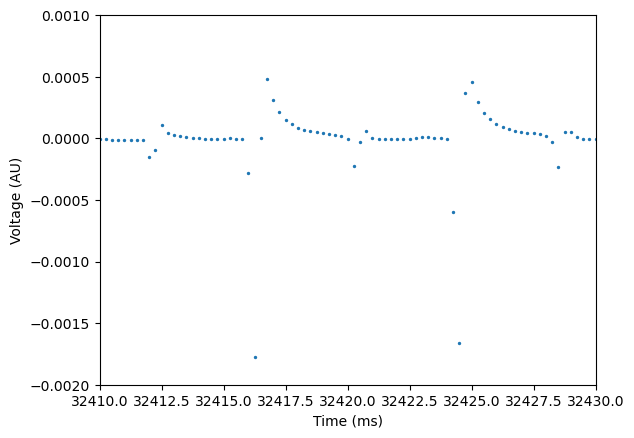

In [180]:
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (AU)')
plt.scatter(x2_time,mne_object_filtered,linewidth=1,s=2)
plt.xlim(32410, 32430)
plt.ylim(-0.002,0.001)
plt.show()

In [137]:
len(mne_object_filtered)
time_point=32000
index_start = int(time_point/1000*mne_object.info['sfreq'])

artefact_start_time_TMSi = 0
l = 0
for l in range(index_start,len(mne_object_filtered)-1):
    if (mne_object_filtered[l] <= -0.0005):
        artefact_start_time_TMSi = x2_time[l]
        break
    else:
        l = l+1
print(f'the first artefact in the TMSi recording starts at \n\t{artefact_start_time_TMSi} ms')

the first artefact in the TMSi recording starts at 
	32416.25 ms


In [148]:
len(mne_object_filtered)

795141

Code which works: **!check again each point one by one!**

In [413]:
#initialize variables (lists and state)
artefacts_x_TMSi = []
artefacts_y_TMSi = []
stimON = False

#start looking at each value one by one and append the timepoint to the list depending on the state and threshold crossed
for q in range(30000,(len(mne_object_filtered)-1)):
    if (stimON == False):
        if (mne_object_filtered[q] <= -0.001) and (mne_object_filtered[q+33] <= -0.0005):
            artefacts_x_TMSi.append(x2_time[q])
            artefacts_y_TMSi.append(mne_object_filtered[q])
            stimON = True
            q = q+1
        else:
            q = q+1

    if (stimON == True):
        if (mne_object_filtered[q] <= -0.001) and (mne_object_filtered[q-1] > mne_object_filtered[q]) and (mne_object_filtered[q] < mne_object_filtered[q+1]) and (mne_object_filtered[q+33] >= -0.0005):
            artefacts_x_TMSi.append(x2_time[q])
            artefacts_y_TMSi.append(mne_object_filtered[q])
            stimON = False
            q = q+1
        else:
            q = q+1

print(
    f'\n\tthe artefacts in the TMSi are at: \t{artefacts_x_TMSi} ms')


	the artefacts in the TMSi are at: 	[32416.25, 34103.75, 39158.5, 41452.25, 45106.0, 47678.5, 179860.0, 181547.75, 185086.75, 187290.5, 190583.75, 192599.0, 198378.5, 198766.5] ms


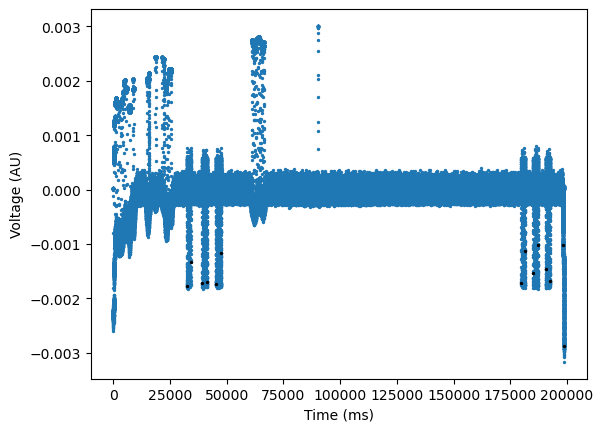

In [415]:
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (AU)')
#plt.xlim(187280,187310)
plt.scatter(x2_time,mne_object_filtered,linewidth=1,s=2)
plt.scatter(artefacts_x_TMSi,artefacts_y_TMSi,color='black',s=2)
plt.show()

Determine duration of each artefact detected

In [385]:
artefact_duration_TMSi=[]
range_r=np.arange(1,len(artefacts_x_TMSi),2)
range_s=np.arange(0,len(artefacts_x_TMSi),2)

for r,s in zip(range_r,range_s):
        artefact_duration_TMSi.append(artefacts_x_TMSi[r]-artefacts_x_TMSi[s])

print(     
	f'The artefacts in the LFP last \t{artefact_duration_LFP} ms,'      
	f'\n\tand the artefacts in the TMSi datas last {artefact_duration_TMSi} ms')


The artefacts in the LFP last 	[1656.0, 2248.0, 2520.0, 1656.0, 2172.0, 1976.0] ms,
	and the artefacts in the TMSi datas last [1687.5, 2293.75, 2572.5, 1687.75, 2203.75, 2015.25, 388.0] ms


Calculate difference between LFP and TMSi:

In [411]:
diff_duration=[]
t=0
for t in (np.arange(0,len(artefact_duration_LFP),1)):
    diff_duration.append(artefact_duration_LFP[t]-artefact_duration_TMSi[t])
diff_duration

[-31.5, -45.75, -52.5, -31.75, -31.75, -39.25]

**Align**